<a href="https://colab.research.google.com/github/signofcommunication/Bible-of-Competitive-Programming/blob/main/UAS_AI_%7C_Jeriko_Ichtus_Seo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Persentase Bukaan Campuran: 50.00 %


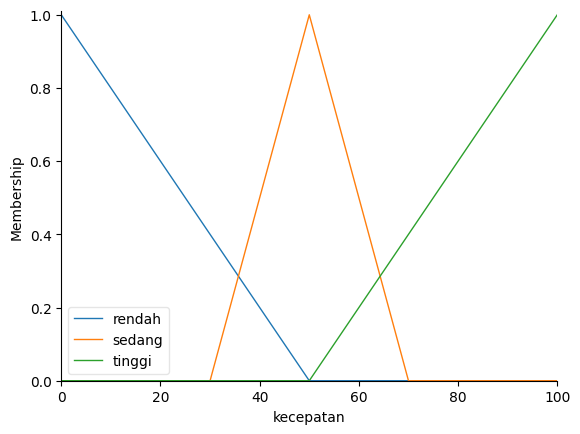

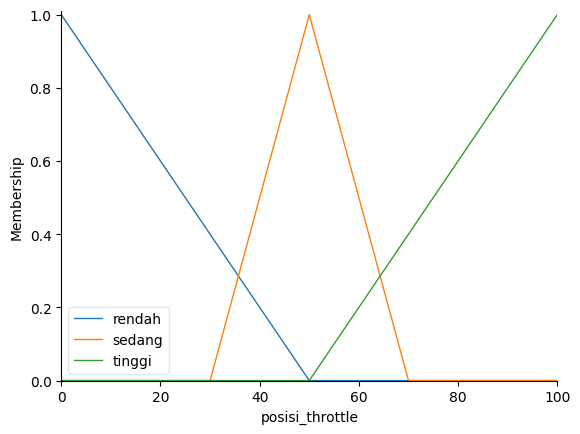

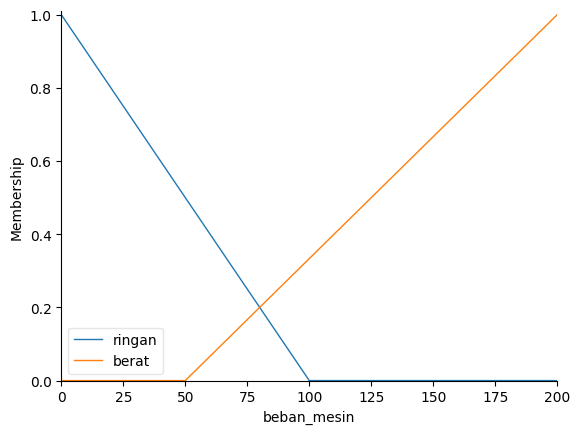

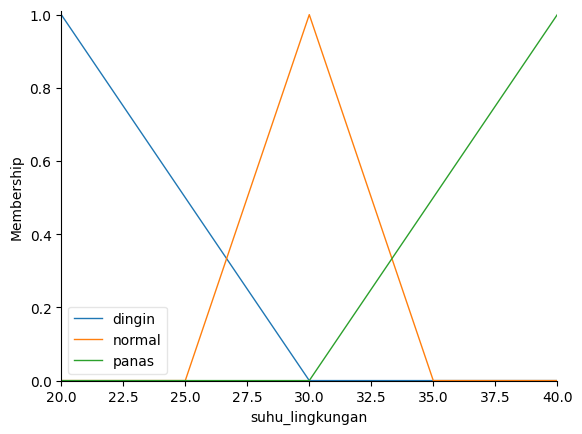

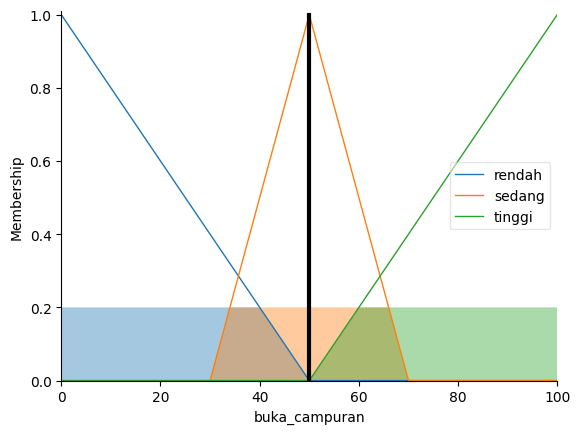

In [4]:
# Variabel input dan output
kecepatan = ctrl.Antecedent(np.arange(0, 101, 1), 'kecepatan')  # km/jam
posisi_throttle = ctrl.Antecedent(np.arange(0, 101, 1), 'posisi_throttle')  # %
beban_mesin = ctrl.Antecedent(np.arange(0, 201, 1), 'beban_mesin')  # kg
suhu_lingkungan = ctrl.Antecedent(np.arange(20, 41, 1), 'suhu_lingkungan')  # °C
buka_campuran = ctrl.Consequent(np.arange(0, 101, 1), 'buka_campuran')  # %

# Fungsi membership / keanggotaan untuk variabel input
kecepatan['rendah'] = fuzz.trimf(kecepatan.universe, [0, 0, 50])
kecepatan['sedang'] = fuzz.trimf(kecepatan.universe, [30, 50, 70])
kecepatan['tinggi'] = fuzz.trimf(kecepatan.universe, [50, 100, 100])

posisi_throttle['rendah'] = fuzz.trimf(posisi_throttle.universe, [0, 0, 50])
posisi_throttle['sedang'] = fuzz.trimf(posisi_throttle.universe, [30, 50, 70])
posisi_throttle['tinggi'] = fuzz.trimf(posisi_throttle.universe, [50, 100, 100])

beban_mesin['ringan'] = fuzz.trimf(beban_mesin.universe, [0, 0, 100])
beban_mesin['berat'] = fuzz.trimf(beban_mesin.universe, [50, 200, 200])

suhu_lingkungan['dingin'] = fuzz.trimf(suhu_lingkungan.universe, [20, 20, 30])
suhu_lingkungan['normal'] = fuzz.trimf(suhu_lingkungan.universe, [25, 30, 35])
suhu_lingkungan['panas'] = fuzz.trimf(suhu_lingkungan.universe, [30, 40, 40])

# Fungsi keanggotaan untuk variabel output (buka_campuran)
buka_campuran['rendah'] = fuzz.trimf(buka_campuran.universe, [0, 0, 50])
buka_campuran['sedang'] = fuzz.trimf(buka_campuran.universe, [30, 50, 70])
buka_campuran['tinggi'] = fuzz.trimf(buka_campuran.universe, [50, 100, 100])

#  54 aturan fuzzy berdasarkan kombinasi 3x3x2x3
rules = [
    # Kecepatan Rendah
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['rendah']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['rendah']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['rendah'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['rendah'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['rendah'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['rendah']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['sedang'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['sedang'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['sedang'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['rendah'] & posisi_throttle['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),

    # Kecepatan Sedang
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['rendah']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['rendah'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['rendah'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['rendah'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['sedang'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['sedang'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['sedang'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['sedang'] & posisi_throttle['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),

    # Kecepatan Tinggi
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['rendah'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['rendah'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['rendah'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['rendah'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['sedang']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['sedang'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['sedang'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['sedang'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['sedang'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['dingin'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['tinggi'] & beban_mesin['ringan'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['dingin'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['normal'], buka_campuran['tinggi']),
    ctrl.Rule(kecepatan['tinggi'] & posisi_throttle['tinggi'] & beban_mesin['berat'] & suhu_lingkungan['panas'], buka_campuran['tinggi']),
]

# Buat sistem kontrol
sistem_kontrol = ctrl.ControlSystem(rules)
simulasi = ctrl.ControlSystemSimulation(sistem_kontrol)

# Data Contoh
simulasi.input['kecepatan'] = 40
simulasi.input['posisi_throttle'] = 30
simulasi.input['beban_mesin'] = 80
simulasi.input['suhu_lingkungan'] = 28

# Jalankan inferensi
simulasi.compute()

# Tampilkan hasil
print(f"Persentase Bukaan Campuran: {simulasi.output['buka_campuran']:.2f} %")

# Visualisasi fungsi keanggotaan
kecepatan.view()
posisi_throttle.view()
beban_mesin.view()
suhu_lingkungan.view()
buka_campuran.view(sim=simulasi)
plt.show()